In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)  # y = sin(X) with some noise

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Noisy Data')  # Scatter plot
plt.plot(X, np.sin(X), color='red', linewidth=2, label='True Function')  # True sin(X)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.legend()
plt.grid()
plt.show()


In [4]:
pip install seaborn
pip install ipywidgets


SyntaxError: invalid syntax (3479072718.py, line 1)

In [5]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 2.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.3 MB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.3 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\FAIZ SIDDIQUI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


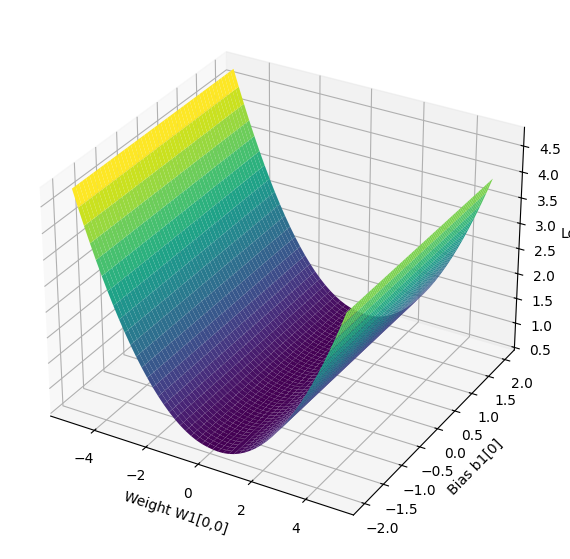

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic regression data
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# Define a simple 2-layer neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)  # ReLU activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)  # MSE loss
    
    def backward(self, X, y_true, y_pred):
        m = y_true.shape[0]
        dz2 = 2 * (y_pred - y_true) / m
        dW2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * (self.z1 > 0)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

# Initialize neural network
nn = NeuralNetwork(input_size=1, hidden_size=10, output_size=1)

# Create a grid for visualization
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-2, 2, 50))
loss_surface = np.zeros_like(grid_x)

# Compute loss surface
for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        nn.W1[0, 0] = grid_x[i, j]  # Change a single weight
        y_pred = nn.forward(X)
        loss_surface[i, j] = nn.compute_loss(y_pred, y)

# Plot the error surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, loss_surface, cmap='viridis')
ax.set_xlabel('Weight W1[0,0]')
ax.set_ylabel('Bias b1[0]')
ax.set_zlabel('Loss')
plt.show()

# Add interactive controls
def update_surface(optimizer_choice):
    print(f"Training with {optimizer_choice} optimizer...")
    # Implement training logic for the selected optimizer

opt_dropdown = widgets.Dropdown(
    options=['SGD', 'Momentum', 'RMSprop', 'Adam', 'Adagrad'],
    description='Optimizer:',
)

widgets.interactive(update_surface, optimizer_choice=opt_dropdown)
